In [1]:
import os

mingw_path = 'C:\\Users\\a1\\mingw\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
train = pd.read_csv('new_train_mean_cl.csv')
test = pd.read_csv('new_test_mean_cl.csv')

In [2]:
del test['Unnamed: 0']
del train['Unnamed: 0']

In [3]:
test = test.drop_duplicates(subset='id').set_index(keys='id').sort_index()

In [5]:
test = test[[u'Semana', u'Producto_ID', u'Cliente_ID', u'lag1', u'lag2', u'lag3', u'Agencia_ID', u'Canal_ID', u'Ruta_SAK',
             u'Cliente_ID_town_count', u'price', u'weight', u'pieces', u'cluster_nombre', u'drink', u'w_per_piece', u'OXXO', 
             u'ARTELI', u'ALSUPER', u'BODEGA', u'CALIMAX', u'XICANS', u'ABARROTES', u'CARNICERIA', u'FRUTERIA', 
             u'DISTRIBUIDORA', u'ELEVEN', u'HOTEL', u'HOSPITAL', u'CAFE', u'FARMACIA', u'CREME', u'SUPER', u'COMOD', 
             u'MODELOR', u'UNKN']]

In [6]:
def RMSLE_score(pred, true):
    score = np.power(pred-true, 2)
    return np.sqrt(np.mean(score))

In [7]:
from sklearn import cross_validation
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBRegressor
from sklearn import grid_search

In [8]:
X = train
y = train['Demanda_uni_equil_log0'].copy()
del train['Demanda_uni_equil_log0']

In [9]:
X['sum_lags'] = X['lag1']+X['lag2']+X['lag3']
test['sum_lags'] = test['lag1']+test['lag2']+test['lag3']

C:\Users\a1\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
le = LabelEncoder()
le.fit(X['Producto_ID'].append(test['Producto_ID']))
X['Producto_ID'] = le.transform(X['Producto_ID'])
test['Producto_ID'] = le.transform(test['Producto_ID'])

C:\Users\a1\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
le = LabelEncoder()
le.fit(X['Agencia_ID'].append(test['Agencia_ID']))
X['Agencia_ID'] = le.transform(X['Agencia_ID'])
test['Agencia_ID'] = le.transform(test['Agencia_ID'])

C:\Users\a1\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
le = LabelEncoder()
le.fit(X['Cliente_ID'].append(test['Cliente_ID']))
X['Cliente_ID'] = le.transform(X['Cliente_ID'])
test['Cliente_ID'] = le.transform(test['Cliente_ID'])

C:\Users\a1\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
#[(0.6, 5, 1)]

train_index = range(0, 30981554)
test_index = range(30981554, 41390266)
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.values[train_index], y.values[test_index]

In [9]:
while True:
    xgbr = params_xgb()
    print xgbr
    xgbr.fit(X_train, y_train)
    preds = xgbr.predict(X_test)
    preds[preds<0] = 0
    print RMSLE_score(preds, y_test)

XGBRegressor(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.80000000000000004, gamma=0.050000000000000003,
       learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0.10000000000000001,
       reg_lambda=0.10000000000000001, scale_pos_weight=1, seed=0,
       silent=True, subsample=0.69999999999999996)
0.682239160824
XGBRegressor(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.59999999999999998, gamma=0.10000000000000001,
       learning_rate=0.050000000000000003, max_delta_step=0, max_depth=15,
       min_child_weight=3, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0.10000000000000001,
       reg_lambda=0.20000000000000001, scale_pos_weight=1, seed=0,
       silent=True, subsample=0.69999999999999996)
0.487202903155
XGBRegressor(base_score=0.5, colsample_bylevel=1,
       colsample_bytree=0.80000000000000

KeyboardInterrupt: 

In [25]:
imp = xgbr.booster().get_fscore()

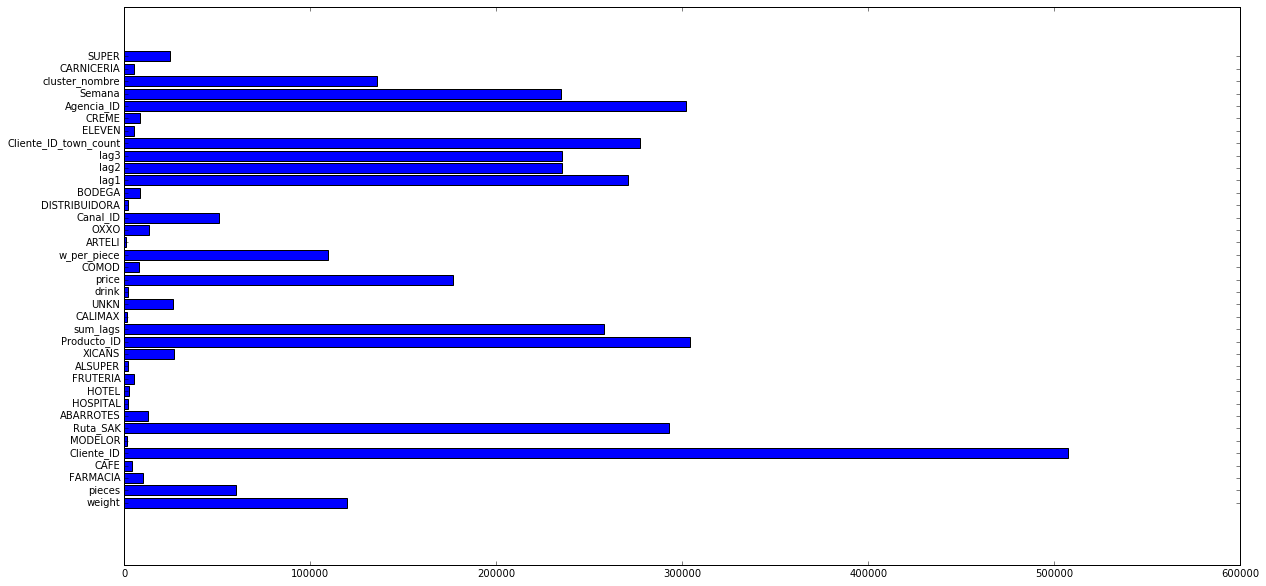

In [36]:
plt.figure(figsize=(20,10))
plt.barh(range(len(imp.keys())), imp.values(), ecolor='r', align='center')
plt.yticks(range(len(imp.keys())), imp.keys())

plt.show()

In [8]:
def params_xgb():
    max_depth=np.random.choice([10,15,20],1)
    learning_rate=np.random.choice([0.01, 0.05, 0.1],1)
    n_estimators=np.random.choice([50, 100, 150, 200],1)
    gamma=np.random.choice([0.05, 0.1, 0],1)
    min_child_weight=np.random.choice([1,3],1)
    subsample=np.random.choice([0.6, 0.7, 0.8],1)
    colsample_bytree=np.random.choice([0.6, 0.7, 0.8],1)
    reg_alpha=np.random.choice([0, 0.1],1)
    reg_lambda=np.random.choice([0.01, 0.1, 0.2],1)
    return XGBRegressor(learning_rate=learning_rate[0], n_estimators=n_estimators[0], max_depth=max_depth[0],
                        gamma=gamma[0], min_child_weight=min_child_weight[0], subsample=subsample[0], 
                        colsample_bytree=colsample_bytree[0], reg_alpha=reg_alpha[0], reg_lambda=reg_lambda[0])

In [23]:
xgbr = XGBRegressor(learning_rate=0.1, n_estimators=250, max_depth=15, subsample=0.9, colsample_bytree=0.85)
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)
preds[preds<0] = 0
print RMSLE_score(preds, y_test)

0.469829199274


In [24]:
subms = xgbr.predict(test)

In [121]:
pd.Series(np.expm1(subms)).to_csv('subm_xgb.csv')

In [16]:
mean_submission = pd.read_csv('submit_mean.csv').set_index(keys='id').sort_index()

In [27]:
mean_submission['xgb_demanda'] = np.expm1(subms)

In [28]:
mean_submission['subm'] = 0.3*mean_submission['Demanda_uni_equil']+0.7*mean_submission['xgb_demanda']

In [30]:
mean_submission['subm'].to_csv('subm_xgb_mean.csv')

In [21]:
mean_submission

,Demanda_uni_equil,xgb_demanda,subm
id,,,
0,3.77390,3.509523,3.588836
1,1.46508,1.437423,1.445720
2,2.08898,2.111219,2.104548
3,1.57699,1.104366,1.246153
4,3.18219,1.979297,2.340165
5,3.18412,2.896696,2.982923
6,1.29527,1.499513,1.438240
7,4.39736,5.349862,5.064111
8,4.83532,2.673816,3.322268
